# Exploratory data analysis in Python.


## Introduction

## What is Exploratory Data Analysis ?

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

## How to perform Exploratory Data Analysis ?
his is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

## What data are we exploring today ?

Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from here. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.

## 1. Importing the required libraries for EDA
Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this demonstartion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## 2.Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.



In [2]:
kaptagat_springs_df = pd.read_csv(r"D:\Coding Projects\Business Analytics\Sales Insights\Kaptagat Springs Project\Kapatgat-Springs-Sales-Insights Power BI\Python EDA\Kaptagat Springs Sales Insights.csv")
# To display the top 5 rows 
kaptagat_springs_df.head(5)   

,Customer ID,Qty Ordered,Unit Price,Total Sales,Invoice Date,Shipping Status,Year,Product Type,MSRP,Product Code,Customer Name
0,10100,30,30,900,1/6/2013 0:00,Shipped,2013,500 ml,170,S18_1749,Sirikwa Hotel
1,10100,50,30,1500,1/6/2013 0:00,Shipped,2013,500 ml,60,S18_2248,Sirikwa Hotel
2,10100,22,30,660,1/6/2013 0:00,Shipped,2013,500 ml,92,S18_4409,Sirikwa Hotel
3,10100,49,30,1470,1/6/2013 0:00,Shipped,2013,500 ml,41,S24_3969,Sirikwa Hotel
4,10101,25,30,750,1/9/2013 0:00,Shipped,2013,500 ml,127,S18_2325,Sirikwa Hotel


In [3]:
kaptagat_springs_df.tail(5)

,Customer ID,Qty Ordered,Unit Price,Total Sales,Invoice Date,Shipping Status,Year,Product Type,MSRP,Product Code,Customer Name
2818,10361,35,25,875,12/17/2014 0:00,Shipped,2014,300 ml,74,S700_4002,Blueberry Villas
2819,10361,23,25,575,12/17/2014 0:00,Shipped,2014,300 ml,49,S72_1253,Blueberry Villas
2820,10361,34,30,1020,12/17/2014 0:00,Shipped,2014,500 ml,65,S24_3420,Blueberry Villas
2821,10361,49,30,1470,12/17/2014 0:00,Shipped,2014,500 ml,68,S32_4289,Blueberry Villas
2822,10361,33,30,990,12/17/2014 0:00,Shipped,2014,500 ml,43,S50_1341,Blueberry Villas


# 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [4]:
kaptagat_springs_df.dtypes

Customer ID         int64
Qty Ordered         int64
Unit Price          int64
Total Sales         int64
Invoice Date       object
Shipping Status    object
Year                int64
Product Type       object
MSRP                int64
Product Code       object
Customer Name      object
dtype: object

## 4. Dropping irrelevant columns


This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [7]:
kaptagat_springs_df = kaptagat_springs_df.drop(['MSRP', 'Product Code' ], axis=1)
kaptagat_springs_df.head(5)

,Customer ID,Qty Ordered,Unit Price,Total Sales,Invoice Date,Shipping Status,Year,Product Type,Customer Name
0,10100,30,30,900,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
1,10100,50,30,1500,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
2,10100,22,30,660,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
3,10100,49,30,1470,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
4,10101,25,30,750,1/9/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel


## 5. Renaming the columns


In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set

In [9]:
kaptagat_springs_df = kaptagat_springs_df.rename(columns={'Invoice Date':'Transaction Date','Qty Ordered':'Quantity Ordered'})
kaptagat_springs_df.head(5)

,Customer ID,Quantity Ordered,Unit Price,Total Sales,Transaction Date,Shipping Status,Year,Product Type,Customer Name
0,10100,30,30,900,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
1,10100,50,30,1500,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
2,10100,22,30,660,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
3,10100,49,30,1470,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
4,10101,25,30,750,1/9/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel


## 6.Dropping the duplicate rows


This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [10]:
kaptagat_springs_df.shape

(2823, 9)

In [11]:
duplicate_rows_df = kaptagat_springs_df[kaptagat_springs_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (230, 9)


Now let us remove the duplicate data because it's ok to remove them.

In [12]:
kaptagat_springs_df.count()

Customer ID         2823
Quantity Ordered    2823
Unit Price          2823
Total Sales         2823
Transaction Date    2823
Shipping Status     2823
Year                2823
Product Type        2823
Customer Name       2823
dtype: int64

So seen above there are 2823 rows and we are removing 230 rows of duplicate data.



In [13]:
kaptagat_springs_df = kaptagat_springs_df.drop_duplicates()
kaptagat_springs_df.head(5)

,Customer ID,Quantity Ordered,Unit Price,Total Sales,Transaction Date,Shipping Status,Year,Product Type,Customer Name
0,10100,30,30,900,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
1,10100,50,30,1500,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
2,10100,22,30,660,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
3,10100,49,30,1470,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
4,10101,25,30,750,1/9/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel


In [14]:
kaptagat_springs_df.count()

Customer ID         2593
Quantity Ordered    2593
Unit Price          2593
Total Sales         2593
Transaction Date    2593
Shipping Status     2593
Year                2593
Product Type        2593
Customer Name       2593
dtype: int64

## 7. Dropping the missing or null values


This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [15]:
print(kaptagat_springs_df.isnull().sum())

Customer ID         0
Quantity Ordered    0
Unit Price          0
Total Sales         0
Transaction Date    0
Shipping Status     0
Year                0
Product Type        0
Customer Name       0
dtype: int64


We dont have missing values

## 8. Detecting Outliers


An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

<Axes: xlabel='Total Sales'>

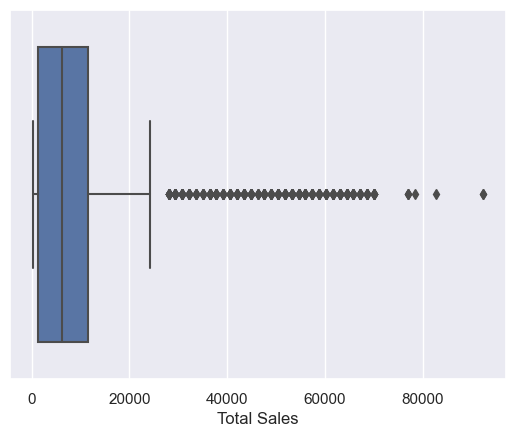

In [17]:
sns.boxplot(x=kaptagat_springs_df['Total Sales'])

In [18]:
kaptagat_springs_df.head(5)

,Customer ID,Quantity Ordered,Unit Price,Total Sales,Transaction Date,Shipping Status,Year,Product Type,Customer Name
0,10100,30,30,900,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
1,10100,50,30,1500,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
2,10100,22,30,660,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
3,10100,49,30,1470,1/6/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel
4,10101,25,30,750,1/9/2013 0:00,Shipped,2013,500 ml,Sirikwa Hotel


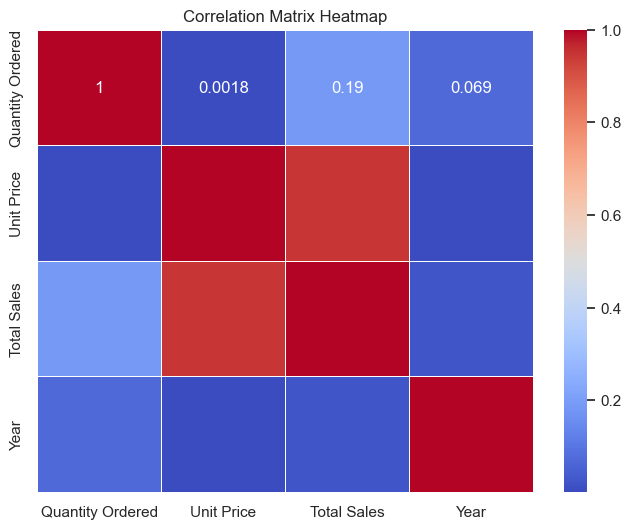

In [19]:
# Selecting numerical columns for correlation matrix
numerical_df = kaptagat_springs_df[['Quantity Ordered', 'Unit Price', 'Total Sales', 'Year']]

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 9.Conclusion

## 1.Quantity Ordered and Total Sales:
There is a strong positive correlation between Quantity Ordered and Total Sales, indicating that an increase in the quantity ordered results in a significant increase in total sales. This is a logical relationship since total sales are calculated as Quantity Ordered * Unit Price.

## 2.Quantity Ordered and Unit Price:
There is no correlation between Quantity Ordered and Unit Price. This is expected as the unit price remains constant at 30 for all entries in this dataset.

## 3.Unit Price and Total Sales:
There is no significant correlation between Unit Price and Total Sales in this dataset due to the constant unit price. In a more varied dataset, this relationship could be more informative.

## 4.Year and Other Variables:
The year has no correlation with other numerical variables, as expected, since all transactions occurred in 2013.
The key takeaway is the strong relationship between the quantity ordered and total sales, which can be used for forecasting and strategic planning in sales operations.